In [2]:
%matplotlib inline
import netCDF4
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
import os

In [12]:
thredds = 'http://thredds.met.no/thredds/dodsC/meps25epsarchive'
year = '2016'
month = '12'
day = '15'
time = '00'
filename = '%s/%s/%s/%s/meps_full_2_5km_%s%s%sT%sZ.nc' %(thredds,year,month,day,year,month,day,time)
fn = netCDF4.Dataset('%s/%s/%s/%s/meps_full_2_5km_%s%s%sT%sZ.nc' %(thredds,year,month,day,year,month,day,time),'r')
#fn = netCDF4.Dataset('http://thredds.met.no/thredds/dodsC/meps25epsarchive/2016/12/18/meps_full_2_5km_20161218T00Z.nc', 'r')

In [17]:
for day in range(10,32):
    try:
        # Open the netCDF file and read it.
        fn = netCDF4.Dataset('%s/%s/%s/%s/meps_full_2_5km_%s%s%sT%sZ.nc' %(thredds,year,month,day,year,month,day,time),'r')
    except OSError:
        print('{} failed in process {}')
        continue
#if (not os.path.isfile(_php)):
 #   print("Error: %s file not found" % _php)
#else:
 #   print("using %s " % _php)
#print(fn)

NameError: name 'line' is not defined

In [4]:
time = fn.variables['time']
# What time is it?
# Start date
print('initialization time',datetime.datetime.utcfromtimestamp(time[0]))


initialization time 2016-12-21 00:00:00


In [5]:
## Latitudes
## [y = 949][x = 739]
latitude = fn.variables['latitude']

## Longitudes 
## [y = 949][x = 739]
longitude = fn.variables['longitude']

In [6]:
### From the with Vertical Levels ( height0 ) : 0.0 m

## 1. air_temperature_0m = Surface temperature (T0M)
## [time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'air_temperature_0m'
temp_sfc = fn.variables[var_name]    # [K]
#print(sfc_temp)

## 2. graupelfall_amount = Instantaneous graupel
## [time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'graupelfall_amount'
graupel_sfc = fn.variables[var_name]   # [kg/m^2]
#print(sfc_graup)

## 3. liquid_water_content_of_surface_snow = Snow Water Equivivalent (SWE) 
## [time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'liquid_water_content_of_surface_snow'
SWE = fn.variables[var_name]         # [kg/m^2]

## 4. precipitation_amount_acc = Accumulated total precipitation
##[time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'precipitation_amount_acc'
precip_sfc = fn.variables[var_name]  # [kg/m^2]
#print(precip_sfc)

## 5. rainfall_amount = Instantanous rainfall at surface
## [time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'rainfall_amount'
rain_sfc = fn.variables[var_name]    # [kg/m^2]
#print(rain_sfc)

## 6. snowfall_amount = Instantaneous snowfall amount at surface
## [time = 56][height0 = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'snowfall_amount'
snow_sfc = fn.variables[var_name]    # [kg/m^2]
#print(snow_sfc)

In [7]:
### with Vertical Levels ( height_above_msl ) : 0.0 m

## 7. air_pressure_at_sea_level = Mean Sea Level Pressure (MSLP)
## [time = 56][height_above_msl = 1][ensemble_member = 10][y = 949][x = 739]
var_name = 'air_pressure_at_sea_level' 
mslp = fn.variables[var_name]        # [Pa]
#print(mslp)

In [8]:
### From with Vertical Levels ( hybrid ) 

## 8. air_temperature_ml = Air temperature model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'air_temperature_ml' 
temp_ml = fn.variables[var_name]     # [K]
#print(temp_ml)

## 9. atmosphere_cloud_condensed_water_content_ml = Atmospheric cloud condensed water content in model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'atmosphere_cloud_condensed_water_content_ml'
CWC_ml = fn.variables[var_name]      # [kg/m^2]
#print(CWC_ml)

## 10. atmosphere_cloud_ice_content_ml = Cloud ice in model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'atmosphere_cloud_ice_content_ml'
CI_ml = fn.variables[var_name]       # [kg/m^2]
#print(CI_ml)

## 11. graupelfall_amount_ml = Instantaneous graupel in model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'graupelfall_amount_ml'
graupel_ml = fn.variables[var_name]  # [kg/m^2]
#print(graupel_ml)

## 12. pressure_departure = Nonhydrostatic departure from hydrostatic pressure
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'pressure_departure'
pres_ml = fn.variables[var_name]    # [Pa]
#print(pres_ml)

## 13. rainfall_amount_ml = Instantanous rain in model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'rainfall_amount_ml'
rain_ml = fn.variables[var_name]     # [kg/m^2]
#print(rain_ml)

## 14. snowfall_amount_ml = Instantaneous snow in model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'snowfall_amount_ml'
snow_ml = fn.variables[var_name]     # [kg/m^2]
#print(snow_ml)

## 15. specific_humidity_ml = Specific humidity model levels
## [time = 56][hybrid = 65][ensemble_member = 10][y = 949][x = 739]
var_name = 'specific_humidity_ml'
q_ml = fn.variables[var_name]        # [kg/kg]


In [9]:
# Stations latitude longitude, the nearest gridpoint we are looking for
stn_lat = 59.8
stn_lon = 7.2


In [10]:
# plot the simulated gridded model data and the point of interest
# Create a basemap to show the data
m = Basemap(llcrnrlon=longitude[:,:].min(), \
            llcrnrlat=latitude[:,:].min(), \
            urcrnrlon=longitude[:,:].max(), \
            urcrnrlat=latitude[:,:].max())



In [11]:
# Now find the absolute value of the difference between the  station's lat/lon with every point in the grid. 
# This tells us how close a point is to the particular latitude and longitude.

abslat = np.abs(latitude[:,:]-stn_lat)
abslon= np.abs(longitude[:,:]-stn_lon)

In [12]:
## If you plot abslat and abslon, you'll see what we have done...we have created two new arrays with that tell us 
## how close each latitude and longitude is to the grid point we are interested in.
#m.drawcoastlines()
#m.pcolormesh(longitude, latitude, abslat)

In [13]:
#m.drawcoastlines()
#m.pcolormesh(longitude, latitude, abslon)

In [14]:
# Now we need to combine these two results. We will use numpy.maximum, which takes two arrays and finds the local 
# maximum.
c = np.maximum(abslon, abslat)


In [15]:
# The dark blue point is the nearest grid location to our station. You can find the index location on the grid of 
# this by using the min function.
latlon_idx = np.argmin(c)

#m.drawcoastlines()
#m.pcolormesh(longitude, latitude, c)


In [16]:
# If you don't like flattened arrays, you can also get the row/column index like this
y, x = np.where(c == np.min(c))
grid_data = temp_sfc[0,0,0,y[0], x[0]]
grid_lat = latitude[y[0], x[0]]
grid_lon = longitude[y[0], x[0]]

print("Value of %s at %s %s" % (grid_data, grid_lat, grid_lon))
print("%s %s is the nearest grid to %s %s" % (grid_lat, grid_lon, stn_lat, stn_lon))

Value of 272.064 at 59.8029204273 7.21592695744
59.8029204273 7.21592695744 is the nearest grid to 59.8 7.2


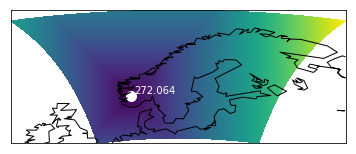

In [17]:
m.drawcoastlines()
m.pcolormesh(longitude, latitude, c)
m.scatter(grid_lon, grid_lat, s=100, c='w')
plt.text(grid_lon+.5, grid_lat+.5, grid_data, color='w')

In [18]:
SWE[:,:,2,y[0],x[0]]
mask = SWE[:,:,2,y[0],x[0]].mask
fill_value = SWE[:,:,2,y[0],x[0]].fill_value

marr = np.ma.array(SWE[:,:,2,y[0],x[0]], mask=mask,fill_value = fill_value)
dt = marr.filled().dtype

In [19]:
### Surface values
f_sfc = netCDF4.Dataset('../test_dataMEPS/%s%s%s_00_sfc.nc' %(year,month,day), 'w')

f_sfc.createDimension('time', 67)            # [time = 67]
f_sfc.createDimension('height0', 1)          # [height0 = 1]
f_sfc.createDimension('height_above_msl', 1) # [height_above_msl = 1]
f_sfc.createDimension('ensemble_member', 10)  # [ensemble_member = 10]
f_sfc.createDimension('y', 1)                # [y = 1]
f_sfc.createDimension('x', 1)                # [x = 1]

grid_time_sfc = f_sfc.createVariable('time', np.float64, ('time',),zlib=True)

grid_temp_sfc = f_sfc.createVariable('temp_sfc', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True)
grid_graupel_sfc = f_sfc.createVariable('graupel_sfc', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True)
grid_SWE = f_sfc.createVariable('Snow Water Equivivalent', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True)
grid_precip_sfc = f_sfc.createVariable('precip_sfc', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True) 
grid_rain_sfc = f_sfc.createVariable('rain_sfc', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True)
grid_snow_sfc = f_sfc.createVariable('snow_sfc', np.float32, ('time','height0','ensemble_member','y','x'),zlib=True)
grid_mslp = f_sfc.createVariable('mslp', np.float32, ('time','height_above_msl','ensemble_member','y','x'),zlib=True)


# get the row/column index like this
y, x = np.where(c == np.min(c))

grid_time_sfc[:] = time[:,]


grid_temp_sfc[:] = temp_sfc[:,:,:,y[0], x[0]]
grid_graupel_sfc[:] = graupel_sfc[:,:,:,y[0], x[0]] 
grid_SWE[:] = SWE[:,:,:,y[0], x[0]] 
grid_precip_sfc[:] = precip_sfc[:,:,:,y[0], x[0]] 
grid_rain_sfc[:] = rain_sfc[:,:,:,y[0], x[0]]  
grid_snow_sfc[:] = snow_sfc[:,:,:,y[0], x[0]] 
grid_mslp[:] = mslp[:,:,:,y[0], x[0]]


In [20]:
f_sfc.close()

In [21]:
### model level values
for EM in range(0,10):
    f_ml = netCDF4.Dataset('../test_dataMEPS/%s%s%s_%d.nc' %(year,month,day,EM), 'w')


    f_ml.createDimension('time', 56)            # [time = 56]
    f_ml.createDimension('hybrid', 65)          # [hybrid = 65]
    f_ml.createDimension('ensemble_member', 1)  # [ensemble_member = 1]
    f_ml.createDimension('y', 1)                # [y = 1]
    f_ml.createDimension('x', 1)                # [x = 1]

    grid_time_ml = f_ml.createVariable('time', np.float64, ('time',),zlib=True)


    grid_temp_ml = f_ml.createVariable('temp_ml', np.int32, ('time','hybrid','ensemble_member','y','x'), zlib=True) 
#grid_CWC_ml = f_ml.createVariable('Cloud_water_content_ml', np.float32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_CI_ml = f_ml.createVariable('cloud_ice', np.float32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_graupel_ml = f_ml.createVariable('graupel_ml', np.int32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_pres_ml = f_ml.createVariable('press_ml', np.float32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_rain_ml = f_ml.createVariable('rain_ml', np.int32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_snow_ml = f_ml.createVariable('snow_ml', np.float32, ('time','hybrid','ensemble_member','y','x'), zlib=True)
#grid_q_ml = f_ml.createVariable('specific_humididty_ml', np.int32, ('time','hybrid','ensemble_member','y','x'), zlib=True)

    grid_time_ml[:] = time[:,]


    grid_temp_ml[:] = temp_ml[:,:,EM,y[0], x[0]] 
#grid_CWC_ml[:] = CWC_ml[:,:,:,y[0], x[0]]
#grid_CI_ml[:] = CI_ml[:,:,:,y[0], x[0]]
#grid_graupel_ml[:] = graupel_ml[:,:,:,y[0], x[0]]
#grid_pres_ml[:] = pres_ml[:,:,:,y[0], x[0]]
#grid_rain_ml[:] = rain_ml[:,:,:,y[0], x[0]]
#grid_snow_ml[:] = snow_ml[:,:,:,y[0], x[0]] 
#grid_q_ml[:] = q_ml[:,:,:,y[0], x[0]]

    f_ml.close()

IndexError: size of data array does not conform to slice